<a href="https://colab.research.google.com/github/rashmic20/DS-NTL-062424/blob/main/DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Multilayer perceptron (MLP) neural network that predicts whether a customer will respond to a campaign or not.

In [ ]:
import pandas as pd

# Load the data with the correct delimiter
data = pd.read_csv('marketing_campaign.csv', delimiter=';')

# Display the first few rows of the dataset
print(data.head())

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

In [ ]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

# Find the most recent date in the dataset
most_recent_date = data['Dt_Customer'].max()

# Create a new feature: the number of days since the customer joined
data['Customer_Since_Days'] = (most_recent_date - data['Dt_Customer']).dt.days

# Drop the original Dt_Customer column since it's no longer needed
data = data.drop(columns=['Dt_Customer'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Handle missing values
data = data.dropna()

# Encode categorical variables
label_encoder = LabelEncoder()
data['Education'] = label_encoder.fit_transform(data['Education'])
data['Marital_Status'] = label_encoder.fit_transform(data['Marital_Status'])
data

# Separate features and target
X = data.drop(columns=['Response'])  # Features
y = data['Response']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Convert the 'Dt_Customer' to a datetime object
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

# Define the MLP model
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)

# Train the model
mlp.fit(X_train, y_train)

# Make predictions
y_pred = mlp.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8761261261261262
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       382
           1       0.56      0.55      0.55        62

    accuracy                           0.88       444
   macro avg       0.74      0.74      0.74       444
weighted avg       0.88      0.88      0.88       444



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the MLP model
mlp = MLPClassifier(max_iter=1000, random_state=42)

# Define a parameter grid to search over
param_grid = {
    'hidden_layer_sizes': [(64,), (64, 32), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate': ['constant', 'adaptive'],
    'alpha': [0.0001, 0.001]  # L2 regularization (alpha) values
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(mlp, param_grid, cv=3, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Display the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Make predictions using the best model
best_mlp = grid_search.best_estimator_
y_pred = best_mlp.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best Hyperparameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (64,), 'learning_rate': 'constant', 'solver': 'sgd'}
Accuracy: 0.8761261261261262
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       382
           1       0.57      0.45      0.50        62

    accuracy                           0.88       444
   macro avg       0.74      0.70      0.72       444
weighted avg       0.87      0.88      0.87       444



In [ ]:
from sklearn.neural_network import MLPClassifier

# Define the MLP with L2 regularization (alpha parameter)
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42, alpha=0.001)

# Train the model
mlp.fit(X_train, y_train)

# Evaluate the model
y_pred = mlp.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8490990990990991


In [46]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization

# Define the model with batch normalization
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(BatchNormalization())  # Add batch normalization
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

# Compile and train
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6341 - loss: 0.6909 - val_accuracy: 0.7584 - val_loss: 0.5590
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8169 - loss: 0.5008 - val_accuracy: 0.8483 - val_loss: 0.4455
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8631 - loss: 0.3805 - val_accuracy: 0.8652 - val_loss: 0.3787
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8934 - loss: 0.3374 - val_accuracy: 0.8652 - val_loss: 0.3409
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9019 - loss: 0.2908 - val_accuracy: 0.8820 - val_loss: 0.3220
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9116 - loss: 0.2533 - val_accuracy: 0.8876 - val_loss: 0.3015
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9137 - loss: 0.2315 - val_accuracy: 0.8820 - val_loss: 0.3031
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9304 - loss: 0.2067 - val_accuracy: 0.8764 - val_loss: 0.3

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,677 (49.52 KB)

 Trainable params: 4,161 (16.25 KB)

 Non-trainable params: 192 (768.00 B)

 Optimizer params: 8,324 (32.52 KB)

In [ ]:
# Define the MLP with SGD and momentum
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42, solver='sgd', momentum=0.9)

# Train the model
mlp.fit(X_train, y_train)

# Evaluate the model
y_pred = mlp.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8783783783783784


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Define the MLP with adaptive learning rate
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42, learning_rate='adaptive', learning_rate_init=0.001)

# Train the model
mlp.fit(X_train, y_train)

# Evaluate the model
y_pred = mlp.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8558558558558559


In [ ]:
import matplotlib.pyplot as plt

# Assuming you're using Keras and have history object after training
history = mlp.fit(X_train, y_train, max_iter=50)
# Evaluate the model
y_pred = mlp.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Plot loss and accuracy
plt.figure(figsize=(12, 4))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

TypeError: BaseMultilayerPerceptron.fit() got an unexpected keyword argument 'max_iter'

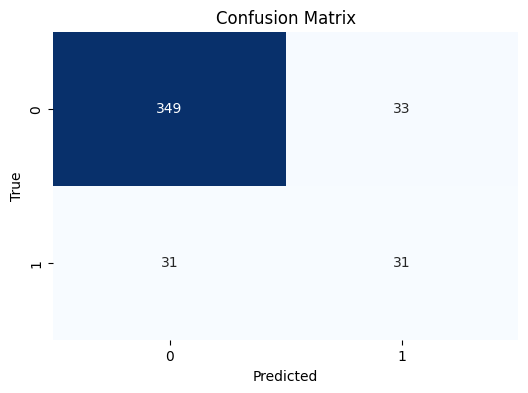

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming 'y_test' are the true labels and 'y_pred' are the predicted labels
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

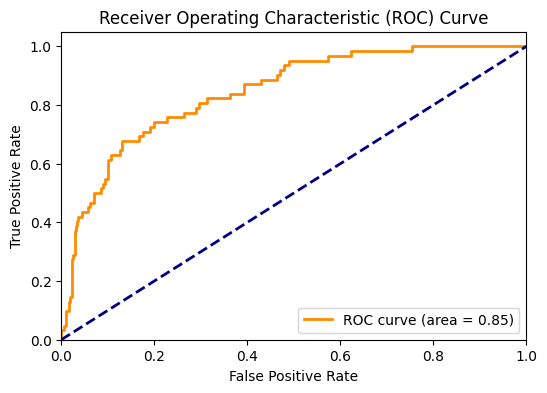

In [ ]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the test set
y_pred_proba = mlp.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

The ROC curve shows that the model has an AUC of 0.84. This indicates that the model is performing reasonably well at distinguishing between the positive and negative classes.

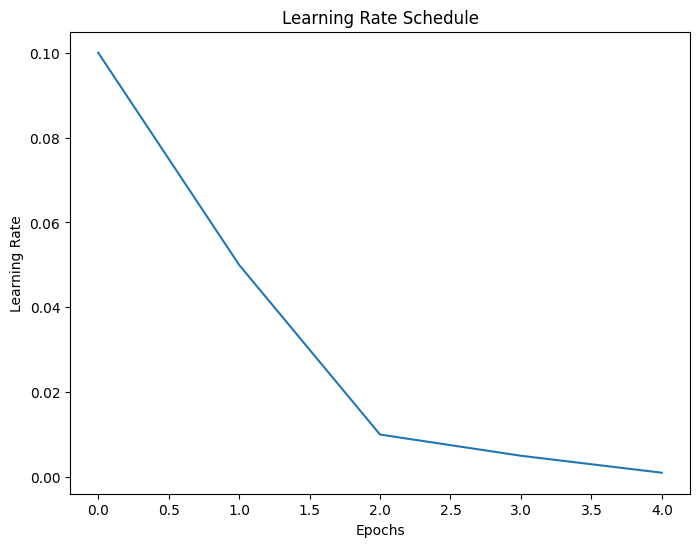

In [ ]:
# Example learning rate schedule
learning_rates = [0.1, 0.05, 0.01, 0.005, 0.001]  # This can be extracted during training

# Plot learning rate schedule
plt.figure(figsize=(8, 6))
plt.plot(range(len(learning_rates)), learning_rates)
plt.xlabel('Epochs')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Schedule')
plt.show()

In [ ]:
# prompt: what is is learning rate schedule showing

# The learning rate schedule shows how the learning rate changes over time during training.
# In this case, the learning rate starts at 0.1 and gradually decreases to 0.001.
# This is a common practice in deep learning to improve model stability and convergence.
# By gradually reducing the learning rate, the model can fine-tune its weights more precisely as it progresses through training.


Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9890 - loss: 0.0354 - val_accuracy: 0.8483 - val_loss: 0.6224
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9930 - loss: 0.0262 - val_accuracy: 0.8539 - val_loss: 0.5487
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9897 - loss: 0.0311 - val_accuracy: 0.8652 - val_loss: 0.5681
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9897 - loss: 0.0298 - val_accuracy: 0.8539 - val_loss: 0.5819
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9905 - loss: 0.0356 - val_accuracy: 0.8539 - val_loss: 0.5770
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9895 - loss: 0.0260 - val_accuracy: 0.8483 - val_loss: 0.5719
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9869 - loss: 0.0421 - val_accuracy: 0.8652 - val_loss: 0.5836
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9870 - loss: 0.0258 - val_accuracy: 0.8652 - val_lo

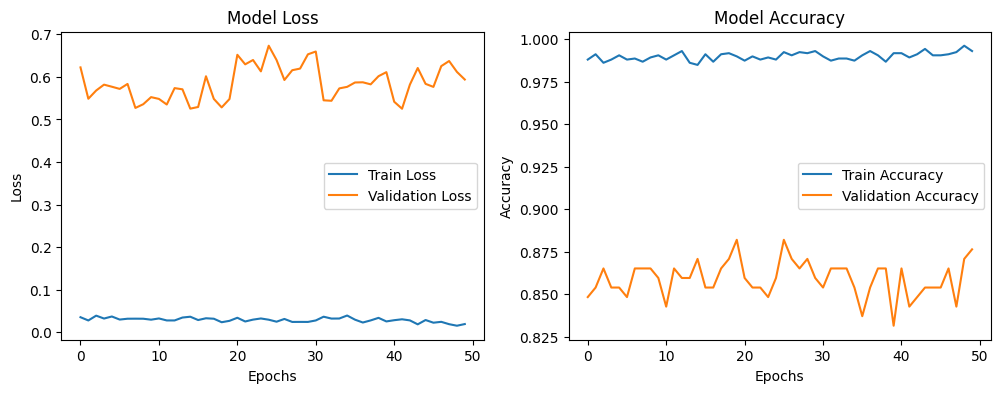

In [ ]:
import matplotlib.pyplot as plt

# Assuming you're using Keras and have history object after training
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

# Plot loss and accuracy
plt.figure(figsize=(12, 4))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

The model is likely overfitting because it achieves very low training loss and high training accuracy, while the validation loss remains high and the validation accuracy fluctuates and is lower.

In [43]:
from tensorflow.keras import regularizers
#Assuming X_train is your training data and has been preprocessed
input_shape = X_train.shape[1]  # Number of features in your dataset


# Add L2 regularization to the Dense layers
model = Sequential()
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(input_shape,)))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(1, activation='sigmoid'))  # for binary classification

In [44]:
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(input_shape,)))
model.add(Dropout(0.5))  # Drop 50% of the neurons during training
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # for binary classification

In [47]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

# Define the model with additional regularization
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(BatchNormalization())  # Batch normalization layer
model.add(Dropout(0.5))  # Dropout layer
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())  # Batch normalization layer
model.add(Dropout(0.5))  # Dropout layer
model.add(Dense(1, activation='sigmoid'))

# Optimizer
optimizer = Adam(learning_rate=0.001)  # You can adjust the learning rate

# Compile the model
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.1,
                    callbacks=[early_stopping])

Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.4958 - loss: 1.0522 - val_accuracy: 0.8258 - val_loss: 0.5424
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6494 - loss: 0.7051 - val_accuracy: 0.8427 - val_loss: 0.4871
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7139 - loss: 0.6367 - val_accuracy: 0.8371 - val_loss: 0.4302
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7629 - loss: 0.5625 - val_accuracy: 0.8483 - val_loss: 0.3918
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7840 - loss: 0.4861 - val_accuracy: 0.8596 - val_loss: 0.3618
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8056 - loss: 0.4404 - val_accuracy: 0.8820 - val_loss: 0.3456
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8239 - loss: 0.4194 - val_accuracy: 0.8876 - val_loss: 0.3340
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8443 - loss: 0.4017 - val_accuracy: 0.8820 - 

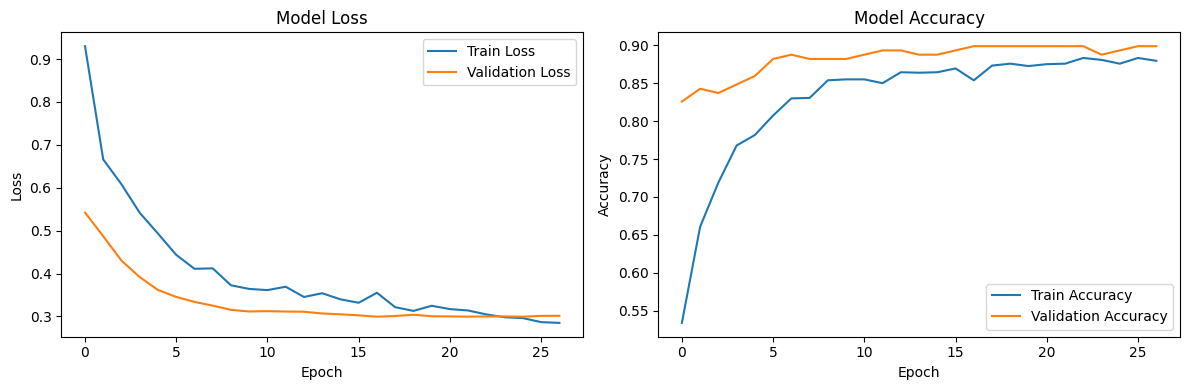

In [48]:
import matplotlib.pyplot as plt

# Assuming 'history' is the output from the fit function of your model
plt.figure(figsize=(12, 4))

# Plot training & validation loss values
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

The model is performing well on both the training and validation sets with no significant overfitting observed. The close tracking of validation metrics with training metrics suggests that the model has generalized well.

#### Key Changes
Dropout: Added dropout layers with a rate of 0.5 after each batch normalization. This randomly sets input units to 0 during training, which helps prevent neurons from co-adapting too much.

Early Stopping: Included an EarlyStopping callback that monitors the validation loss and will stop the training if the validation loss does not improve for 10 consecutive epochs. It also restores the weights from the best epoch.

Optimizer: Specified the learning rate for the Adam optimizer. This gives you more control over the optimization process, and you might want to experiment with different rates.